# Using Pretrained Models for Image Classification

In [1]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.applications.resnet50 import decode_predictions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image
import numpy as np
import os

Using TensorFlow backend.


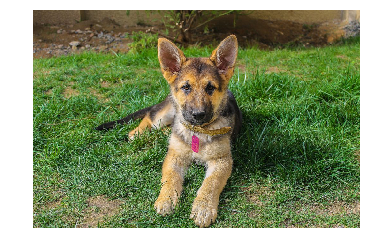

In [2]:
img = mpimg.imread('dog.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
model = ResNet50(weights = 'imagenet')

In [4]:
img = image.load_img("dog.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [5]:
x = np.expand_dims(x, axis = 0)
x.shape


(1, 224, 224, 3)

In [6]:
x = preprocess_input(x)

In [7]:
preds = model.predict(x)
print(decode_predictions(preds, top=4))

[[('n02106662', 'German_shepherd', 0.98429376), ('n02105162', 'malinois', 0.010653343), ('n02096051', 'Airedale', 0.0032358237), ('n02115641', 'dingo', 0.00048650964)]]


# Predicting multiple images out of a  directory

For this to work we need to figure out if the path directory has subdirectories then iterate through them.

In [8]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

import os
path = "C://Users//harri/Desktop//dogscats//train"

def ModelInst():
    model = InceptionV3(weights = "imagenet")
    return model

In [9]:
def BuildPathList(path, num_of_files = 3):
    path_list = []
    #append in 3 cat jpg file paths
    for file in os.listdir(path+"//cats")[:num_of_files]:
        path_list.append(path + "//cats//"+ file)
    #append 3 dog paths
    for file in os.listdir(path+"//dogs")[:num_of_files]:
        path_list.append(path + "//dogs//"+ file)
    return path_list

In [10]:
def PreprocessImages(path_list):
    #turn images into numpy arrays
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size = (244,299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        x = preprocess_input(x)
        out.append(x)
    x = np.vstack(out)
    return x

In [11]:
def ShowExplanation(x, y, model):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(x[y], model.predict, top_labels = 3, hide_color=0, num_samples = 1000)
    out = []
    for num in range(10000):
        try:
            temp, mask = explanation.get_image_and_mask(num, positive_only = False, num_features = 3, hide_rest = False)
            plt.imshow(mark_boundaries(temp/2+0.5, mask))
            plt.axis("off")
            plt.show()
            break
        except:
            continue
    
def ShowPredictions(x, model, with_explanations = False):
    for y in range(len(x)):
        if with_explanations:
             ShowExplanation(x, y, model)
        else:
            plt.imshow(x[y] / 2+0.5)
            plt.axis("off")
            plt.show()
        preds = model.predict(x)
        for z in decode_predictions(preds, top = 3)[y]:
            print(z)

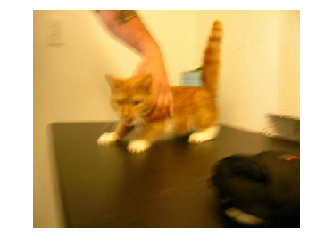

('n02094258', 'Norwich_terrier', 0.37285048)
('n02096294', 'Australian_terrier', 0.091830306)
('n02096177', 'cairn', 0.08002363)


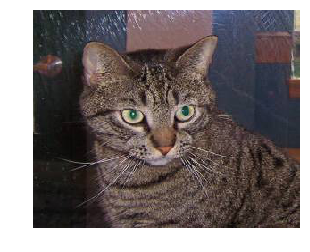

('n02123045', 'tabby', 0.955742)
('n02124075', 'Egyptian_cat', 0.03039863)
('n02123159', 'tiger_cat', 0.008426104)


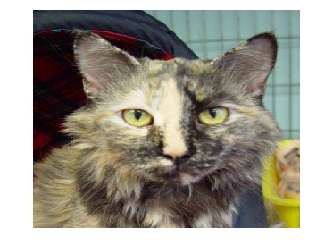

('n02123045', 'tabby', 0.43375364)
('n02123159', 'tiger_cat', 0.41379)
('n02971356', 'carton', 0.007548219)


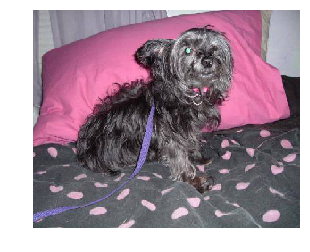

('n02094433', 'Yorkshire_terrier', 0.22856137)
('n02097658', 'silky_terrier', 0.22369215)
('n02113624', 'toy_poodle', 0.19102009)


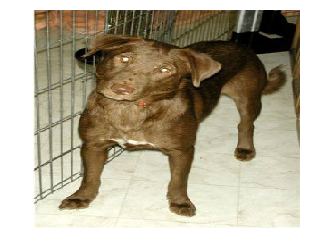

('n02099849', 'Chesapeake_Bay_retriever', 0.966023)
('n02105412', 'kelpie', 0.012832801)
('n02099712', 'Labrador_retriever', 0.00776366)


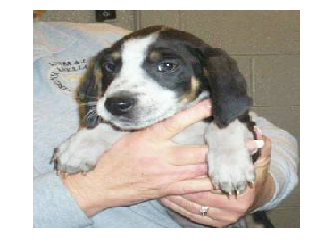

('n02089867', 'Walker_hound', 0.94103026)
('n02107574', 'Greater_Swiss_Mountain_dog', 0.01888798)
('n02089973', 'English_foxhound', 0.016089391)


0

In [12]:
def PredictImages(path, num_of_files =3,  with_explanations = False):
    model = ModelInst()
    path_list = BuildPathList(path, num_of_files = num_of_files)
    images = PreprocessImages(path_list)
    ShowPredictions(images,model, with_explanations = with_explanations)
    return 0

PredictImages(path)

# Model Interprtation with Lime

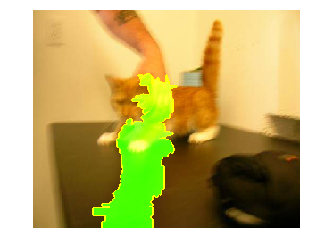

('n02094258', 'Norwich_terrier', 0.3728509)
('n02096294', 'Australian_terrier', 0.091830276)
('n02096177', 'cairn', 0.080023676)


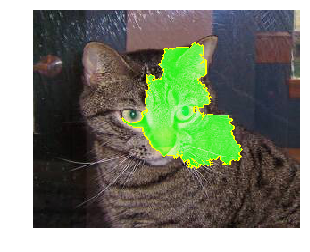

('n02123045', 'tabby', 0.955742)
('n02124075', 'Egyptian_cat', 0.03039863)
('n02123159', 'tiger_cat', 0.008426104)


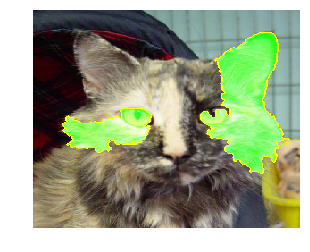

('n02123045', 'tabby', 0.43375364)
('n02123159', 'tiger_cat', 0.41379)
('n02971356', 'carton', 0.0075482046)


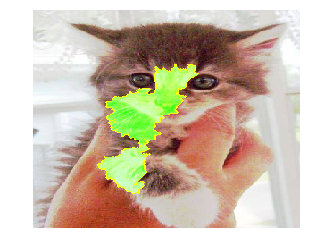

('n04040759', 'radiator', 0.53559077)
('n02123045', 'tabby', 0.16901752)
('n04070727', 'refrigerator', 0.06399276)


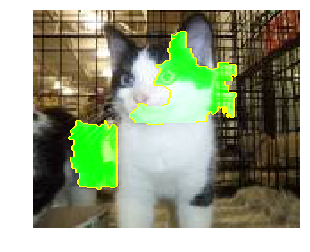

('n02124075', 'Egyptian_cat', 0.41811836)
('n02123159', 'tiger_cat', 0.1760251)
('n02123045', 'tabby', 0.14208175)


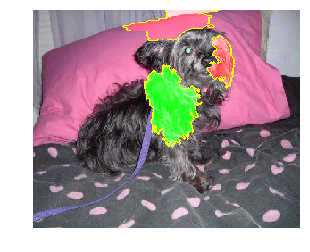

('n02094433', 'Yorkshire_terrier', 0.22856139)
('n02097658', 'silky_terrier', 0.22369216)
('n02113624', 'toy_poodle', 0.19102009)


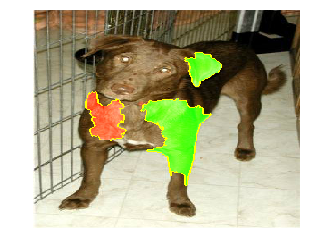

('n02099849', 'Chesapeake_Bay_retriever', 0.96602315)
('n02105412', 'kelpie', 0.012832778)
('n02099712', 'Labrador_retriever', 0.00776365)


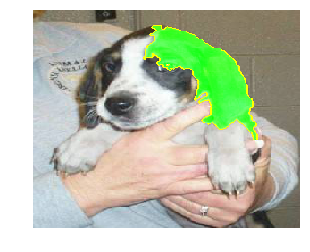

('n02089867', 'Walker_hound', 0.94103026)
('n02107574', 'Greater_Swiss_Mountain_dog', 0.01888798)
('n02089973', 'English_foxhound', 0.016089391)


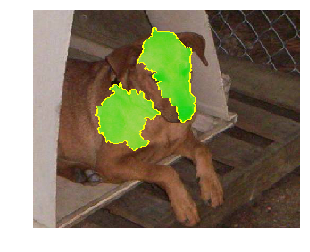

('n02099712', 'Labrador_retriever', 0.44686225)
('n02087394', 'Rhodesian_ridgeback', 0.3446583)
('n02090379', 'redbone', 0.060365193)


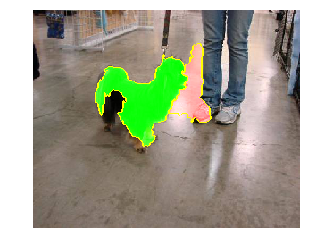

('n02112018', 'Pomeranian', 0.65151775)
('n02098413', 'Lhasa', 0.07580324)
('n02105855', 'Shetland_sheepdog', 0.058881674)


0

In [13]:
PredictImages(path,num_of_files = 5, with_explanations = True)